In [2]:
from datasets import load_dataset

import matplotlib.pyplot as plt 
from IPython.display import Audio
import numpy as np 
import librosa

/home/lukas/miniconda3/envs/dal-toolbox/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
esc_spectrogram = load_dataset("ashraq/esc50", split="train")

Found cached dataset parquet (/home/lukas/.cache/huggingface/datasets/ashraq___parquet/ashraq--esc50-1000c3b73cc1500f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


In [4]:
from transformers import WhisperFeatureExtractor

feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")


In [5]:
def prepare_dataset(samples):
    audio_array = [x["array"] for x in samples["audio"]]
    features = feature_extractor(
        audio_array, sampling_rate=16_000, padding=True
    )
    return features

In [6]:
esc_spectrogram = esc_spectrogram.map(
    prepare_dataset, 
    batched=True, 
    batch_size=200,
    remove_columns=["audio", "filename", "fold", "category", "esc10","src_file", "take"],
    )


Loading cached processed dataset at /home/lukas/.cache/huggingface/datasets/ashraq___parquet/ashraq--esc50-1000c3b73cc1500f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-b3493e8c3ece21cc.arrow


In [7]:
len(esc_spectrogram[0]["input_features"][0])

1378

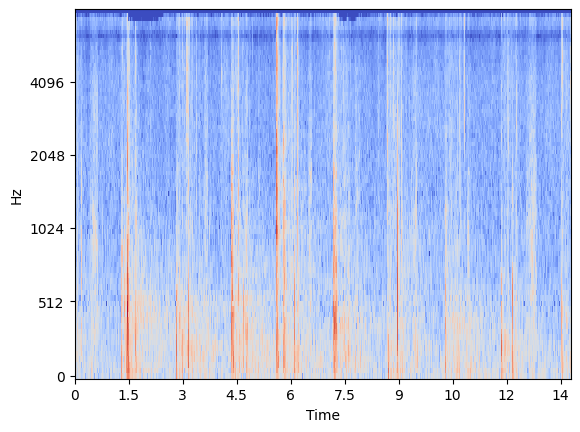

In [8]:
spectrogram = esc_spectrogram[40]["input_features"]
librosa.display.specshow(
    np.asarray(spectrogram),
    x_axis="time",
    y_axis="mel",
    sr=feature_extractor.sampling_rate,
    hop_length=feature_extractor.hop_length
)

In [9]:
esc_spectrogram

Dataset({
    features: ['target', 'input_features'],
    num_rows: 2000
})